<a href="https://www.kaggle.com/code/tejasurya/thomas-cup-2022-tweets-eda-sentiment?scriptVersionId=100185128" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🏸Thomas Cup Badminton 2022 - Tweets Analysis

<center><img src= "https://www.insidesport.in/wp-content/uploads/2022/05/WhatsApp-Image-2022-05-15-at-10.47.42-PM.jpeg" alt ="wind-mills" style='width:500px;'></center>

## Thomas Cup 
The Thomas Cup, sometimes called the World Men's Team Championships, is an international badminton competition among teams representing member nations of the Badminton World Federation (BWF), the sport's global governing body. The championships have been conducted every two years since the 1982, amended from being conducted every three years since the first tournament held in 1948–1949.

The final phase of the tournament involves 12 teams competing at venues within the host nation and is played concurrently with the final phase of the world women's team championships, the Uber Cup (first held in 1956–1957). Since 1984, the two Cups have been held jointly at the various stages of play. Thomas Cup and, to a lesser extent, Uber Cup are some of the world's "biggest" and most prestigious regularly held badminton events in terms of player and fan interest.

Of the 30 Thomas Cup tournaments held since 1948–1949, only six countries have won the title. Indonesia is the most successful team, having won 14 times. China, which did not begin to compete until the 1982, trails Indonesia with 10 titles, while Malaysia has won 5 titles.

Japan became the fourth country to win the Thomas Cup after beating Malaysia 3–2 in the 2014 final. Denmark became the first European and the fifth nation overall to win the Thomas Cup after beating Indonesia 3–2 in the 2016 final. This marked the first and only time a non-Asian team won the championship. India is the current champion, having won its first title after beating title holders Indonesia 3-0 in the 2022 edition. [Source](https://en.wikipedia.org/wiki/Thomas_Cup)

I collected the Tweets on the Thomas Cup Badminton 2022 as a dataset and performed EDA, Sentiment Analysis using NLTK and Textblob. <br>
Check out the dataset [here](https://www.kaggle.com/datasets/tejasurya/thomas-cup-2022-badminton-tweets)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

**Reading dataset**

In [2]:
tweets_data = pd.read_parquet('../input/thomas-cup-2022-badminton-tweets/thomascup_2022_tweets.parquet')
print(tweets_data.head())

                                                                  text  \
id                                                                       
1529235395812155392  India has won the Thomas cup,  @nikhat_zareen ...   
1528224948111941633  PM’s interaction with Thomas Cup Champions is ...   
1527216966171144193  India won maiden Thomas Cup after defeating 14...   
1526912239910785024  #India's bunch of exceptionally proficient #Ba...   
1526893293136924672  #India's bunch of exceptionally proficient #Ba...   

                          username  \
id                                   
1529235395812155392    themohanty_   
1528224948111941633       goikarpk   
1527216966171144193     BeShararat   
1526912239910785024   aaiprayagraj   
1526893293136924672  aaisapairport   

                                                              hashtags  \
id                                                                       
1529235395812155392                             ['India', 'IndianE

**Shape**

In [3]:
tweets_data.shape

(9704, 14)

**Columns**

In [4]:
tweets_data.columns

Index(['text', 'username', 'hashtags', 'created_at', 'user followers count',
       'replycount', 'retweetcount', 'likecount', 'quotecount', 'language',
       'quotedtweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers'],
      dtype='object')

In [5]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9704 entries, 1529235395812155392 to 1477540830172696577
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   text                  9704 non-null   string             
 1   username              9704 non-null   string             
 2   hashtags              9680 non-null   string             
 3   created_at            9704 non-null   datetime64[ns, UTC]
 4   user followers count  9704 non-null   int64              
 5   replycount            9704 non-null   int64              
 6   retweetcount          9704 non-null   int64              
 7   likecount             9704 non-null   int64              
 8   quotecount            9704 non-null   int64              
 9   language              9704 non-null   string             
 10  quotedtweet           0 non-null      string             
 11  inReplyToTweetId      1174 non-null 

**DType conversion**

In [6]:
tweets_data['text'] = tweets_data['text'].astype('string')
tweets_data['username'] = tweets_data['username'].astype('string')
tweets_data['hashtags'] = tweets_data['hashtags'].astype('string')
tweets_data['created_at'] = pd.to_datetime(tweets_data['created_at'])
tweets_data['language'] = tweets_data['language'].astype('string')
tweets_data['quotedtweet'] = tweets_data['quotedtweet'].astype('string')
tweets_data['inReplyToUser'] = tweets_data['inReplyToUser'].astype('string')
tweets_data['mentionedUsers'] = tweets_data['text'].astype('string')

In [7]:
tweets_data.dtypes

text                                 string
username                             string
hashtags                             string
created_at              datetime64[ns, UTC]
user followers count                  int64
replycount                            int64
retweetcount                          int64
likecount                             int64
quotecount                            int64
language                             string
quotedtweet                          string
inReplyToTweetId                    float64
inReplyToUser                        string
mentionedUsers                       string
dtype: object

In [8]:
tweets_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user followers count,9704.0,2.976977e+04,3.719312e+05,0.000000e+00,4.200000e+01,2.010000e+02,7.280000e+02,1.442951e+07
replycount,9704.0,2.629534e+00,3.166389e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.499000e+03
retweetcount,9704.0,4.743714e+00,6.512001e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.724000e+03
likecount,9704.0,4.182615e+01,5.650757e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.108000e+04
quotecount,9704.0,1.114695e+00,1.909837e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.410000e+02
inReplyToTweetId,1174.0,1.525281e+18,3.082754e+15,1.473159e+18,1.525163e+18,1.525770e+18,1.525783e+18,1.538479e+18


In [9]:
tweets_data.drop(columns=['quotedtweet'],inplace=True)

### **Missing values**

In [10]:
def missing_data(data):
    total_count = tweets_data.isnull().sum()
    percentage = (tweets_data.isnull().sum()/tweets_data.isnull().count()*100)
    concat = pd.concat([total_count, percentage], axis=1, keys=['Total', 'Percentage'])
    types = []
    for col in tweets_data.columns:
        dtype = str(tweets_data[col].dtype)
        types.append(dtype)
    concat['Types'] = types
    return(np.transpose(concat))

In [11]:
missing_data(tweets_data)

,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers
Total,0,0,24,0,0,0,0,0,0,0,8530,8530,0
Percentage,0.0,0.0,0.247321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.901896,87.901896,0.0
Types,string,string,string,"datetime64[ns, UTC]",int64,int64,int64,int64,int64,string,float64,string,string


# EDA

## Sentiment analysis
### With nltk SentimentIntensityAnalyzer

In [12]:
sia = SentimentIntensityAnalyzer()
def get_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

In [13]:
tweets_data['text_sentiment'] = tweets_data['text'].apply(lambda x: get_sentiment(x))

In [14]:
cols = tweets_data.columns

## Data Exploration

**Most frequent words**

In [15]:
def frequent_values(data):
    total = data.count()
    temp_df = pd.DataFrame({'total':total})
    items,values = [],[]
    for col in cols:
        item = data[col].value_counts().index[0]
        value = data[col].value_counts().values[0]
        items.append(item)
        values.append(value)
    temp_df['Most frequent item'] = items
    temp_df['Count'] = values
    temp_df['Percent from total'] = np.round(values / total * 100, 3)
    return temp_df.T

In [16]:
frequent_values(tweets_data)

,text,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,inReplyToTweetId,inReplyToUser,mentionedUsers,text_sentiment
total,9704,9704,9680,9704,9704,9704,9704,9704,9704,9704,1174,1174,9704,9704
Most frequent item,#ThomasCup,mellikkaa,['ThomasCup'],2022-05-15 09:46:19+00:00,0,0,0,0,0,en,1525774257401131008.0,https://twitter.com/mellikkaa,#ThomasCup,Positive
Count,68,125,4512,12,133,8125,8162,4984,9180,5827,16,100,68,5126
Percent from total,0.701,1.288,46.612,0.124,1.371,83.728,84.11,51.36,94.6,60.047,1.363,8.518,0.701,52.824


**Observation**<br>
* "#thomascup" is the most frequent words used in the tweets.
* There are 5126 tweets with positive sentiment.

**Username**

In [17]:
def plot_count(feature, title, df, size=1, ordered=True):
    fig, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        fig1 = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set2')
    else:
        fig1 = sns.countplot(df[feature], palette='Set2')
    fig1.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,'{:1.2f}%'.format(100*height/total),ha="center") 
    plt.show()  

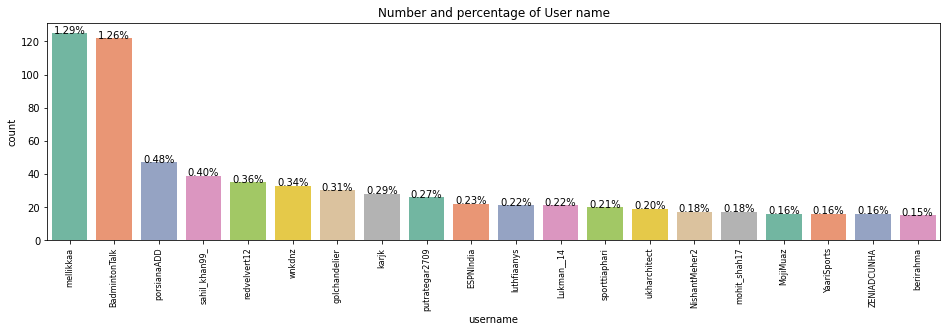

In [18]:
plot_count("username", "User name", tweets_data,4)

**Observation**<br>
* Mellikka is the user that tweeted most number of times @ 125 on this topic.
* Followed by the users BadmintonTalk, porsianaADD etc.

## Data Visualisation

**Wordcloud**

In [19]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Badminton" "India", "Thomascup", "Thomas"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

## Title

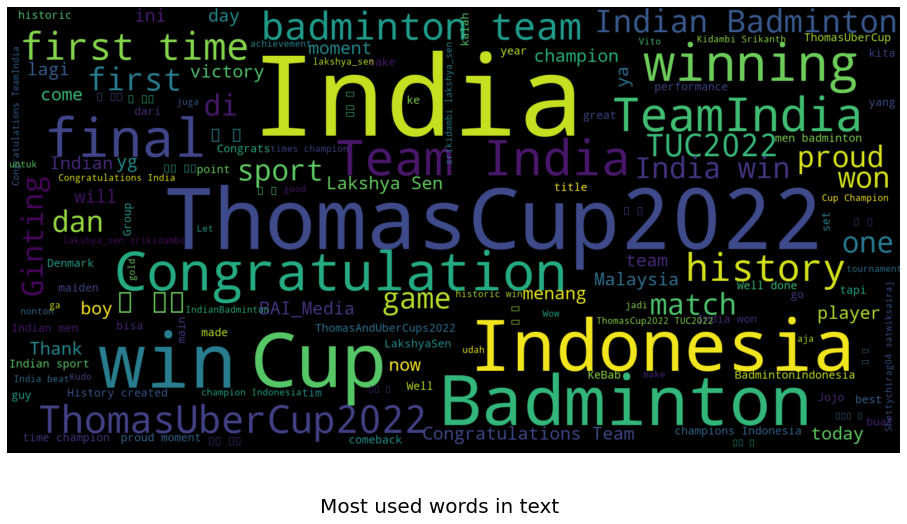

In [20]:
show_wordcloud(tweets_data['text'], title = 'Most used words in text')

In [21]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=14)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=14)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

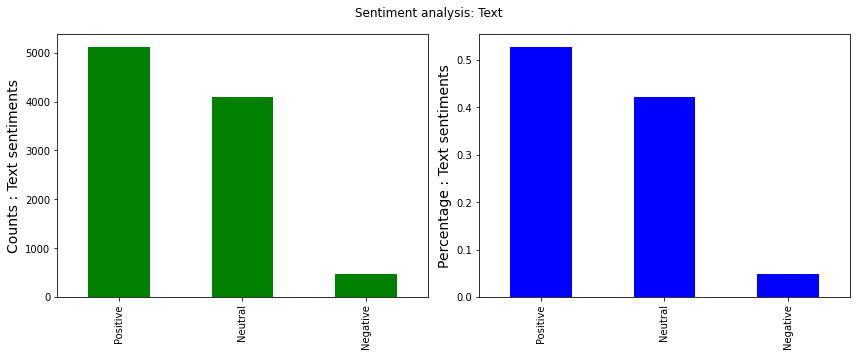

In [22]:
plot_sentiment(tweets_data, 'text_sentiment', 'Text')

**Observation**
* 52.82% positive tweets in the Thomas cup 2022 badminton dataset. 

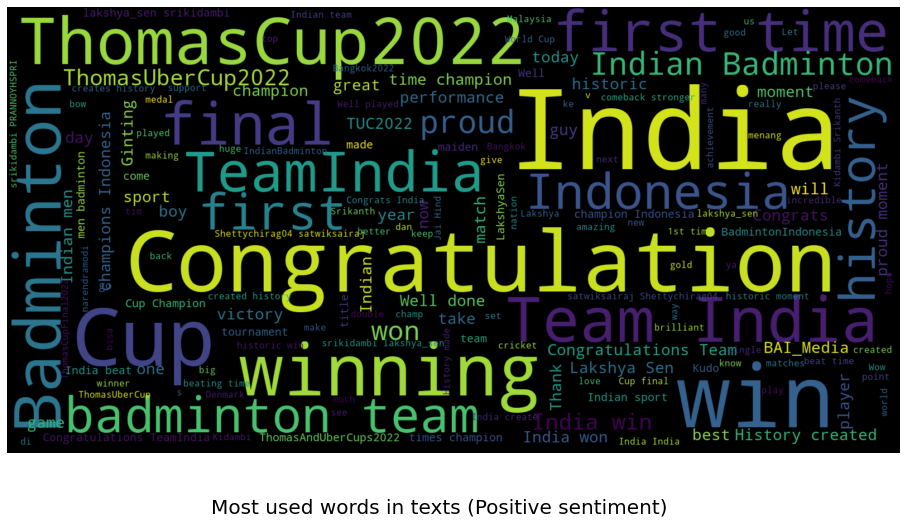

In [23]:
show_wordcloud(tweets_data.loc[tweets_data['text_sentiment']=='Positive', 'text'], title = 'Most used words in texts (Positive sentiment)')

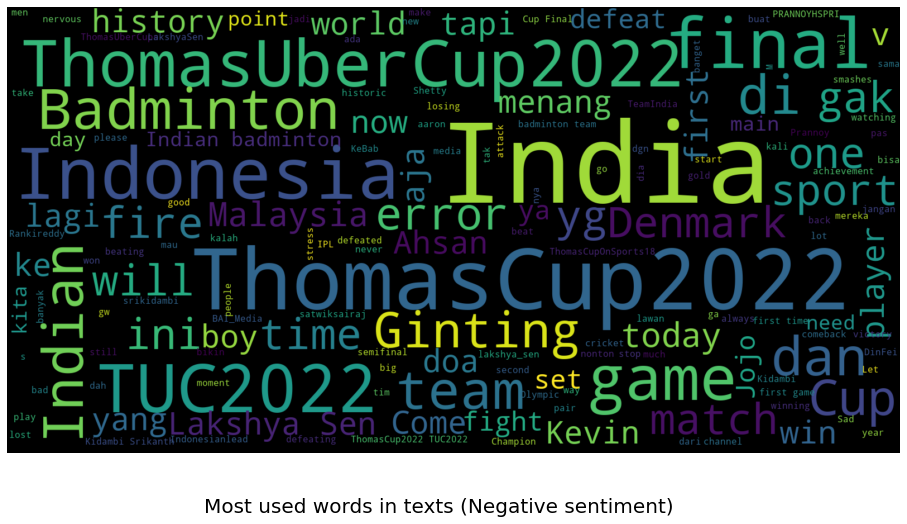

In [24]:
show_wordcloud(tweets_data.loc[tweets_data['text_sentiment']=='Negative', 'text'], title = 'Most used words in texts (Negative sentiment)')

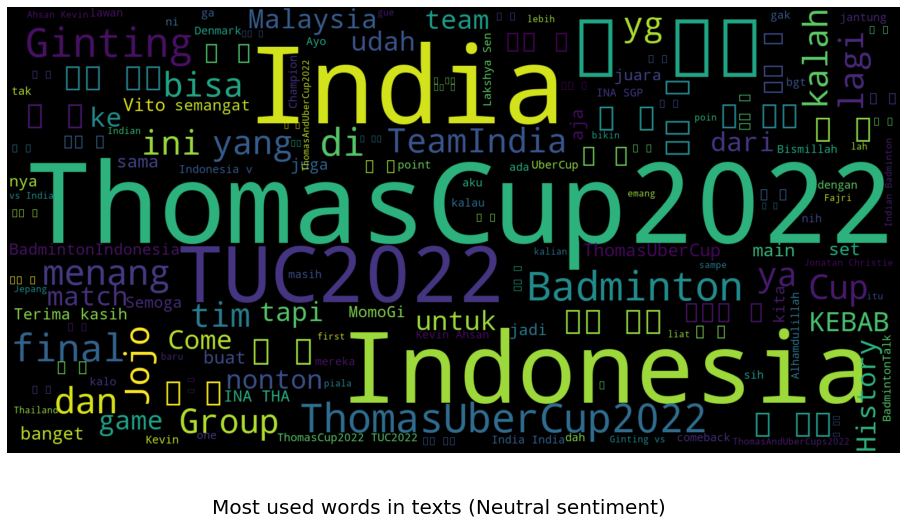

In [25]:
show_wordcloud(tweets_data.loc[tweets_data['text_sentiment']=='Neutral', 'text'], title = 'Most used words in texts (Neutral sentiment)')

## With TextBlob

In [26]:
def get_sentiment_polarity_textblob(post):
    blob = TextBlob(post)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

def get_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

In [27]:
tweets_data['text_sentiment_polarity'] = tweets_data['text'].apply(lambda x: get_sentiment_polarity_textblob(x))
tweets_data['text_sentiment_subjectivity'] = tweets_data['text'].apply(lambda x: get_sentiment_subjectivity_textblob(x))

In [28]:
def plot_sentiment_textblob(df, feature, title):
    polarity = df[feature+'_sentiment_polarity']
    subjectivity = df[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='blue')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=14)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=14)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

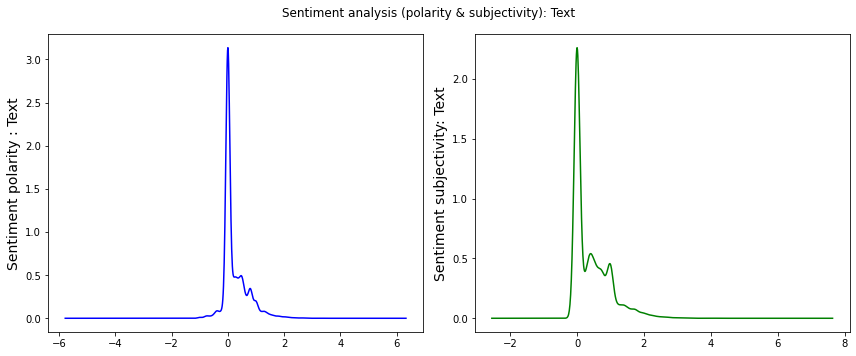

In [29]:
plot_sentiment_textblob(tweets_data, "text", 'Text')

If you liked the Thomas Cup 2022 tweets dataset, please do upvote it. Feedbacks and Suggestions are welcomed. Thanks a lot! - `@tejasurya`